# Kenya eCitizen Services Dataset – Exploratory Overview

This notebook provides a structured overview of the Kenya eCitizen Services Dataset
(February 2026 snapshot).

We examine:

- Dataset size and structure
- Relational integrity across entities
- Service distribution across ministries
- Reported vs observed service counts
- Basic structural validation

The dataset represents publicly accessible content on the eCitizen platform
as observed on 14 February 2026.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# --- Load Data --- #

DATA_PATH = '../input/kenya-ecitizen-services-dataset/'
DATA_PATH = './tmp/'

services = pd.read_csv(DATA_PATH + 'services.csv')
agencies = pd.read_csv(DATA_PATH + 'agencies.csv')
ministries = pd.read_csv(DATA_PATH + 'ministries.csv')
departments = pd.read_csv(DATA_PATH + 'departments.csv')
faqs = pd.read_csv(DATA_PATH + 'faqs.csv')

print('Services:', services.shape)
print('Agencies:', agencies.shape)
print('Ministries:', ministries.shape)
print('Departments:', departments.shape)
print('FAQs:', faqs.shape)

Services: (5489, 8)
Agencies: (286, 10)
Ministries: (27, 9)
Departments: (54, 6)
FAQs: (15, 3)


In [3]:
# --- Check for Duplicates --- #


def check_duplicates(df, id_col):
	return df.duplicated(id_col).sum()


print(
	'Duplicate service_id:',
	check_duplicates(services, 'service_id'),
)
print(
	'Duplicate agency_id:',
	check_duplicates(agencies, 'agency_id'),
)
print(
	'Duplicate ministry_id:',
	check_duplicates(ministries, 'ministry_id'),
)
print(
	'Duplicate department_id:',
	check_duplicates(departments, 'department_id'),
)
print('Duplicate faq_id:', check_duplicates(faqs, 'faq_id'))

Duplicate service_id: 0
Duplicate agency_id: 0
Duplicate ministry_id: 0
Duplicate department_id: 0
Duplicate faq_id: 0


In [4]:
# --- Referential Integrity --- #

orphan_services = set(services['agency_id']) - set(
	agencies['agency_id']
)
orphan_agencies = set(agencies['department_id']) - set(
	departments['department_id']
)
orphan_departments = set(departments['ministry_id']) - set(
	ministries['ministry_id']
)

print('Orphan services:', len(orphan_services))
print('Orphan agencies:', len(orphan_agencies))
print('Orphan departments:', len(orphan_departments))

Orphan services: 0
Orphan agencies: 0
Orphan departments: 0


In [5]:
# --- Services per Ministry --- #

services_per_ministry = (
	services.groupby('ministry_id')
	.size()
	.reset_index(name='service_count')
)

merged = services_per_ministry.merge(
	ministries[['ministry_id', 'ministry_name']],
	on='ministry_id',
	how='left',
).sort_values('service_count', ascending=False)

merged.head()

,ministry_id,service_count,ministry_name
25,de273f239829,1196,Ministry Of Roads And Transport
4,21513791e78a,689,Ministry Of Education
3,16190641f2b5,657,The National Treasury And Economic Planning
17,84b249e08c14,577,Ministry Of Agriculture And Livestock Development
18,8bfda0c9fd5d,480,"Ministry Of Environment, Climate Change And Fo..."


/var/folders/fb/3xzhdzg96bs11b2p9l46l77h0000gn/T/ipykernel_70631/1047408794.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


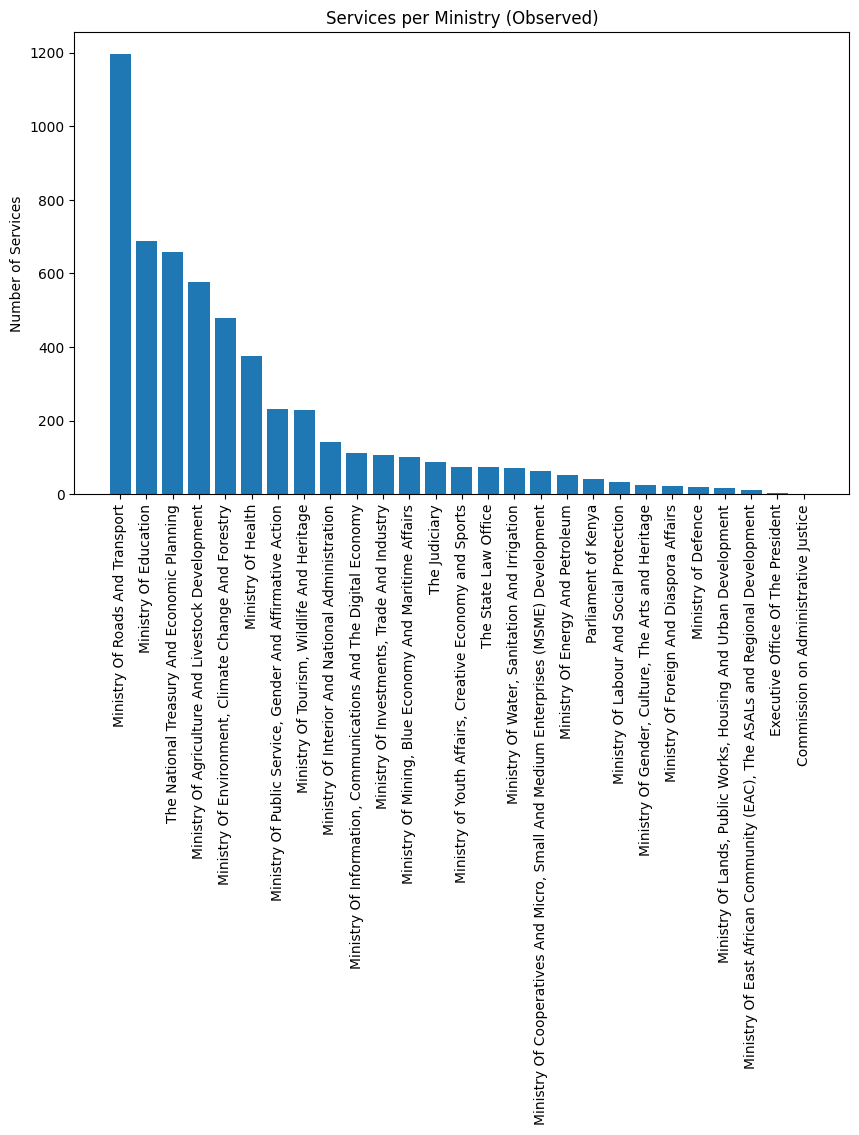

In [6]:
plt.bar(merged['ministry_name'], merged['service_count'])
plt.xticks(rotation=90)
plt.title('Services per Ministry (Observed)')
plt.ylabel('Number of Services')
plt.tight_layout()
plt.show()

In [7]:
# --- Reported vs Observed Services per Ministry --- #

comparison = ministries[
	[
		'ministry_name',
		'reported_service_count',
		'observed_service_count',
	]
].copy()

comparison['difference'] = (
	comparison['reported_service_count']
	- comparison['observed_service_count']
)

comparison.sort_values('difference', ascending=False).head()

,ministry_name,reported_service_count,observed_service_count,difference
19,Ministry Of Roads And Transport,2034,1196,838
2,Ministry Of Agriculture And Livestock Development,864,577,287
25,The National Treasury And Economic Planning,798,657,141
17,"Ministry Of Mining, Blue Economy And Maritime ...",125,102,23
15,Ministry Of Labour And Social Protection,53,32,21


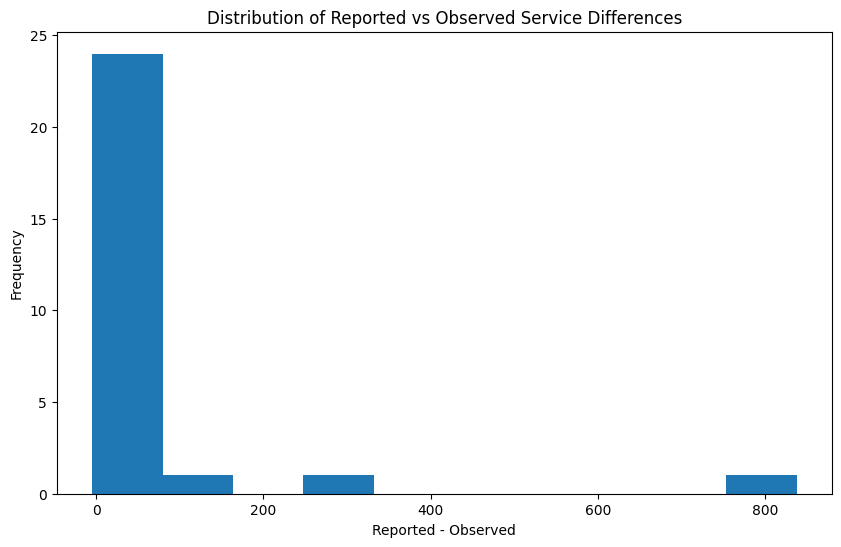

In [8]:
plt.hist(comparison['difference'], bins=10)
plt.title(
	'Distribution of Reported vs Observed Service '
    'Differences'
)
plt.xlabel('Reported - Observed')
plt.ylabel('Frequency')
plt.show()

In [9]:
# --- Services per Agency --- #

services_per_agency = (
	services.groupby('agency_id')
	.size()
	.reset_index(name='service_count')
)

agency_merged = services_per_agency.merge(
	agencies[['agency_id', 'agency_name']],
	on='agency_id',
	how='left',
).sort_values('service_count', ascending=False)

agency_merged.head(10)

,agency_id,service_count,agency_name
276,f518cc98e7f1,787,Kenya Ports Authority
91,4fbfdf283b17,355,Kenya Forest Service
95,51864c0ea192,247,Agriculture And Food Authority (AFA)
191,a7f019389d85,246,Kenya Civil Aviation Authority
255,e5b1ca1eb1bc,210,Kenya School Of Government
278,f524d404cb72,205,Tourism Regulatory Authority
142,7860925e82cb,174,The Kenya Accountants And Secretaries National...
262,ead069f20030,170,Kenya Trade Network Agency (KENTRADE)
193,aa31e54a2abe,145,Kenya Revenue Authority
67,40eb6a194c52,113,National Environmental Management Authority


In [10]:
services_per_ministry['service_count'].describe()

count      27.000000
mean      203.296296
std       285.592477
min         1.000000
25%        29.000000
50%        74.000000
75%       230.500000
max      1196.000000
Name: service_count, dtype: float64

## Summary

This exploratory analysis confirms:

- No duplicate identifiers across entities.
- No orphaned relational records.
- 5,489 publicly discoverable services across 27 ministries.
- Minimal discrepancies between platform-reported and observed counts.
- Structurally consistent hierarchical relationships.

The dataset represents a clean, reproducible snapshot of the publicly
navigable service layer of the Kenya eCitizen platform as of February 2026.
